<a href="https://colab.research.google.com/github/electriccheffer/CVLabs2022/blob/main/Keras1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

The above code snipit imports the required libraries for the Lab.  

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  79.2M      0  0:00:09  0:00:09 --:--:-- 87.7M


In [3]:
!ls

kagglecatsanddogs_3367a.zip  sample_data


In [4]:
!unzip -q kagglecatsanddogs_3367a.zip

In [5]:
!ls

 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


Above, we have imported the images of some cats and dogs.  Below, we are performing some filtering of the data using the os library from  Python.  We are checking to make sure that the first ten bytes are properly configured with the jfif.  

In [6]:
import os
num_skipped = 0
for folder_name in ("Cat","Dog"):
  folder_path = os.path.join("PetImages",folder_name)
  for f_name in os.listdir(folder_path):
    fpath = os.path.join(folder_path,f_name)
    try:
      fobj = open(fpath,"rb")
      is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
      fobj.close()
    
    if not is_jfif:
      num_skipped += 1 
      os.remove(fpath)
print("Deleted %d images " % num_skipped)


Deleted 1590 images 


The os Python library is being used here to build our file paths which we then turn into a file object and use the peek function to examine the first ten bytes of the path and make sure that the header tells us that the image is a jfif.

We are using tf.compat.as_bytes().  Here is a link to the relevant libray used:  https://www.tensorflow.org/api_docs/python/tf/compat

We now move into generating the dataset:

In [7]:
image_size = (180,180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "PetImages",
      validation_split=0.2,
      subset="training",
      seed=1337,
      image_size=image_size,
      batch_size=batch_size,

  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "PetImages",
      validation_split=0.2,
      subset="validation",
      seed=1337,
      image_size=image_size,
      batch_size=batch_size


  )

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


We are making two datasets in the above code using the tensorflow.keras.preprocessing module documentation can be found in the following link: https://keras.io/api/preprocessing/

The preprocessing module allows us to move data from disk into tensorflow.  We give the function in each case the parameters: a directory, validation_split, subset, seed, image_size, and batch_size.  

**validation_split**: says what fraction of the input data to into validation set using a floating point value. 
**subset**:names the subsets as training or validation 
**seed**: a seed value used to randomize or transform the images.

We now move onto viewing the images.  

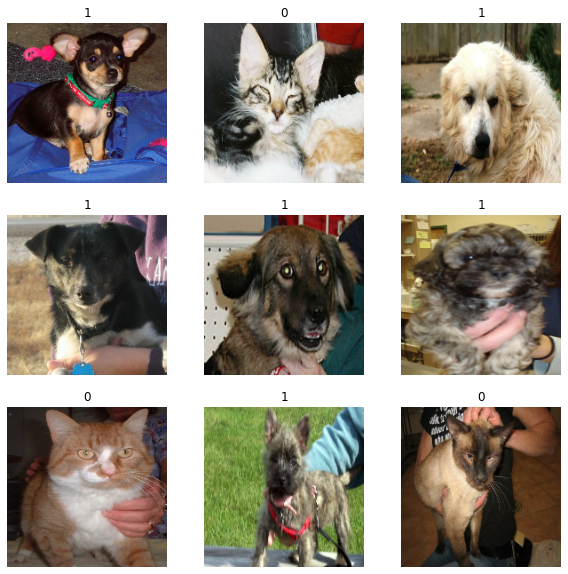

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

What then was done in the code above?  We imported our matplotlib which is a library used for creating visualizations in python.  We use the pyplot module of the library which is a matplot way of plotting.  Here is the link to the documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html

We start by creating a figure, going through our labled training images and assigning them to a grid with their expected value.  

In [15]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.1),
    ]
  )

We use the RandomFlip and RandomRotation to avoid overfitting our model.  Observing the outputs below.  

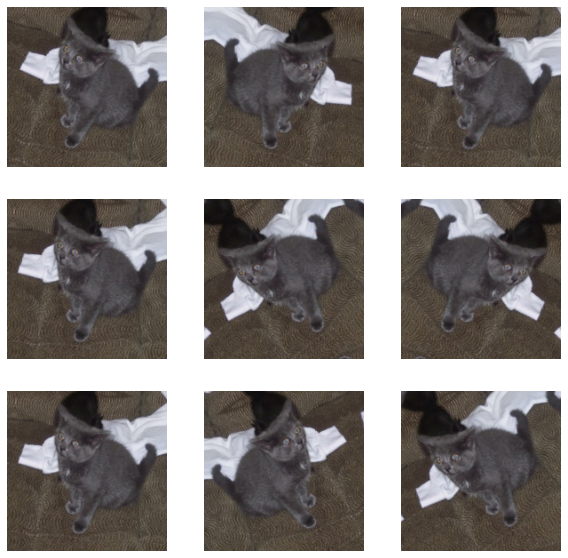

In [19]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

The next task is a configuration of the dataset for performance.  

In [20]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

It is now time to build the model.  

In [ ]:
def make_model(input_shape, num_classes)
  inputs = keras.Input(shape=input_shape)
  